# MP1 -- Armand Jordana

In [1]:
from mp1 import generate_a_disk, generate_a_rectangle
from mp1 import generate_dataset_classification, generate_test_set_classification
from mp1 import generate_dataset_regression, generate_test_set_regression, visualize_prediction
from mp1 import visualize_prediction6
from mp1 import generate_two_triangles, generate_two_disks, generate_two_rectangles, generate_dataset_denoising
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Task 1 : Simple Classification

We start by generating a set  of  images  of  simple  geometric  shapes  (rectangle,  disk,  triangle)
centered in the images :

In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0


Here, we build a linear classifier to classify an image into one of the three possible categories. The gradient descent can be done with Adam or SGD : 

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
model = Sequential()

In [4]:
nb_neurons = 3
model.add(Dense(nb_neurons, input_shape=(5184,)))
model.add(Activation('softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
Y_train = to_categorical(Y_train, num_classes=3, dtype='float32')
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 1.8188 - acc: 0.3400
Epoch 2/20
300/300 [==============================] - 0s 243us/step - loss: 0.6968 - acc: 0.7200
Epoch 3/20
300/300 [==============================] - 0s 204us/step - loss: 0.5175 - acc: 0.8133
Epoch 4/20
300/300 [==============================] - 0s 210us/step - loss: 0.4023 - acc: 0.8833
Epoch 5/20
300/300 [==============================] - 0s 243us/step - loss: 0.3748 - acc: 0.8333
Epoch 6/20
300/300 [==============================] - 0s 268us/step - loss: 0.2808 - acc: 0.9367
Epoch 7/20
300/300 [==============================] - 0s 248us/step - loss: 0.2660 - acc: 0.9367
Epoch 8/20
300/300 [==============================] - 0s 225us/step - loss: 0.2130 - acc: 0.9600
Epoch 9/20
300/300 [==============================] - 0s 244us/step - loss: 0.1842 - acc: 0.9800
Epoch 10/20
300/300 [==============================] - 0s 211us/step - loss: 0.1744 - acc: 0.9633
Epoch 11/20
300/300 [==========

We have a very good loss and accuracy on the train set. And we can make good predictions on the test : here is an example of the prediction of a rectangle : 

In [5]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

### Task 2 : Visualization of the Solution

This cell aims to visualize the weights of the linear classifier. We can reconize on each figure the shape that we try to predict.

Text(0.5, 1.0, 'Triangle')

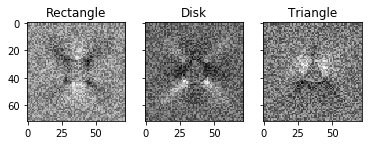

In [6]:
IMAGE_SIZE = 72
im1 = model.get_weights()[0][:,0]
im2 = model.get_weights()[0][:,1]
im3 = model.get_weights()[0][:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax1.set_title('Rectangle')
ax2.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2.set_title('Disk')
ax3.imshow(im3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax3.set_title('Triangle')


###  Task 3 : A More Difficult Classification Problem

In [7]:
n_train = 4000
[X_train, Y_train] = generate_dataset_classification(n_train, 20, True)
[X_test, Y_test] = generate_test_set_classification()
Y_train = to_categorical(Y_train, num_classes=3, dtype='float32')


Creating data:
0
500
1000
1500
2000
2500
3000
3500
Creating data:
0


We use the same model but with shapes that are allowed to move within the images and change dimension.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
model = Sequential()
nb_neurons = 3
model.add(Dense(nb_neurons, input_shape=(5184,)))
model.add(Activation('softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
4000/4000 [==============================] - 11s 3ms/step - loss: 1.1095 - acc: 0.5012
Epoch 2/40
4000/4000 [==============================] - 1s 138us/step - loss: 0.9942 - acc: 0.5563
Epoch 3/40
4000/4000 [==============================] - 1s 140us/step - loss: 1.0087 - acc: 0.5670
Epoch 4/40
4000/4000 [==============================] - 1s 125us/step - loss: 0.8792 - acc: 0.6042
Epoch 5/40
4000/4000 [==============================] - 1s 133us/step - loss: 0.8465 - acc: 0.6040
Epoch 6/40
4000/4000 [==============================] - 1s 135us/step - loss: 0.8815 - acc: 0.5990
Epoch 7/40
4000/4000 [==============================] - 1s 148us/step - loss: 0.8772 - acc: 0.6048
Epoch 8/40
4000/4000 [==============================] - 1s 137us/step - loss: 0.8526 - acc: 0.6100
Epoch 9/40
4000/4000 [==============================] - 1s 145us/step - loss: 0.8671 - acc: 0.6105
Epoch 10/40
4000/4000 [==============================] - 1s 139us/step - loss: 0.8281 - acc: 0.6142
Epoch 11/4

In [9]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 406us/step


[1.0231185062726338, 0.6066666666666667]

We only get an accuracy of 66% on the train after 40epochs and with a training on 4000 images. However, if we use a simple CNN with only one layer of convolution, we can get very good results.

In [10]:
X_train = X_train.reshape(n_train,72,72,1)
X_test = X_test.reshape(300,72,72,1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, pooling
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
model = Sequential()
nb_neurons = 16
model.add(Conv2D(nb_neurons, kernel_size=5, activation='relu', input_shape=(72,72,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
4000/4000 [==============================] - 8s 2ms/step - loss: 0.9654 - acc: 0.4903
Epoch 2/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.8188 - acc: 0.5900
Epoch 3/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.7585 - acc: 0.6435
Epoch 4/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.7137 - acc: 0.6838
Epoch 5/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6718 - acc: 0.7210
Epoch 6/40
4000/4000 [==============================] - 6s 1ms/step - loss: 0.6346 - acc: 0.7433
Epoch 7/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5874 - acc: 0.7843
Epoch 8/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5417 - acc: 0.8067
Epoch 9/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5069 - acc: 0.8282
Epoch 10/40
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4752 - acc: 0.8400
Epoch 11/40
4000/4000 [======

In [12]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 942us/step


[0.19280865629514057, 0.9466666674613953]

We now get an accuracy of 94% on the test which is far better than for the simple model without convolutions.

### Task 4 : A Regression Problem

The task now is to predict the image locations of the vertices of a triangle.

In [13]:
n_train = 2000
[X_train, Y_train0] = generate_dataset_regression(n_train, 20)
[X_test, Y_test0] = generate_test_set_regression()

Creating data:
0
500
1000
1500
Creating data:
0


Here, the three vertices of a triangle are given by a vector of length $2 \times 3$. In this task, we face the problem that two similar triangles can have two very different vectors if the vertices are not given in the same order. In order to simplify this regression problem, we need to ordonate each list of vertices. To do so, we re-ordonate the vector of vertices by putting in first position, the closest vertex of $(0,0)$ and in second position, the closest vertex of $(1,0)$.

In [14]:
import numpy as np
def ordonate(Y):
    Y_temp = np.zeros((len(Y), 6))
    x_right = np.array([1,0])
    for i in range(len(Y)):
        a = np.argmin([np.linalg.norm(Y[i][:2]), np.linalg.norm(Y[i][2:4]), np.linalg.norm(Y[i][4:])])
        Y_temp[i][0], Y_temp[i][1] = Y[i][2*a], Y[i][2*a+1]
        # b = np.argmax([np.linalg.norm(Y[i][k:k+2])/np.linalg.norm(Y[i][a:a+2])  for k in range(3) if k != a])
        L = [np.linalg.norm(Y[i][2*k:2*k+2] - x_right) for k in range(3)]
        L[a] = 10
        b = np.argmin(L)
        Y_temp[i][2], Y_temp[i][3] = Y[i][2*b], Y[i][2*b+1]
        for l in range(3):
            if  l != a and l != b:
                Y_temp[i][4], Y_temp[i][5] = Y[i][2*l], Y[i][2*l+1]
    return Y_temp
Y_train = ordonate(Y_train0)
Y_test = ordonate(Y_test0)

For this regression problem, I use network with 4 layers of convolution and 6 fully connected layers.

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, pooling
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from tensorflow.keras.utils import normalize
model = Sequential()


X_train = X_train.reshape(n_train,72,72,1)
X_test = X_test.reshape(300,72,72,1)
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(72,72,1), strides=2))
model.add(Conv2D(64, kernel_size=3, activation='relu', strides=2))
model.add(Conv2D(256, kernel_size=3, activation='relu', strides=2))
model.add(Conv2D(256, kernel_size=3, activation='relu', strides=2))
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dense(6))
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0824
Epoch 2/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0294
Epoch 3/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0181
Epoch 4/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0147
Epoch 5/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0123
Epoch 6/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0105
Epoch 7/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0091
Epoch 8/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0073
Epoch 9/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0060
Epoch 10/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0051
Epoch 11/20
2000/2000 [==============================] - 10s 5ms/step - loss: 0.0041
Epoch 12/20
2000/2000 [==============================] - 10s 5ms/step - lo

In [16]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 2ms/step


0.007281907722353935

After, the training, we have a very reasonable loss on the test and we are able to predict in a very nice way the position of each vertices :

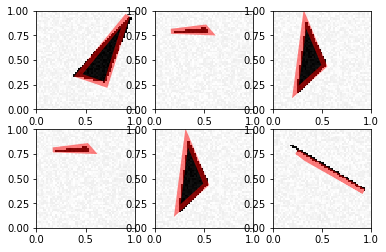

In [17]:
visualize_prediction6(X_test[:6], model.predict(X_test)[:6])


### Image Denoising : 

In [2]:
n_train = 1000
X_train0, Y_train0 = generate_dataset_denoising(n_train, noise=100)

Creating data:
0
500


In [3]:
n_test = 300
X_test0, Y_test0 = generate_dataset_denoising(n_test, noise=100)

Creating data:
0


In this section, we generate pairs of images, where one image has noise with random amplitude, and the second image has the same content but without the noise. We aim to train a hourglass network to predict a noise-free image given a noisy
image as input. Here is an example of a pair of images of the train set :

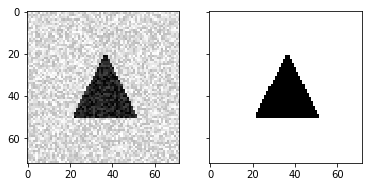

In [4]:
IMAGE_SIZE = 72
im1 = X_train0[0]
im2 = Y_train0[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


Here we implement a hourglass network for denoising :

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

model = Sequential()


X_train = X_train0.reshape(n_train,72,72,1)/255
Y_train = Y_train0.reshape(n_train,72,72,1)/255


conv1a = Conv2D(32,  kernel_size=3, input_shape=(72,72,1), activation = 'relu')
pool1 = MaxPooling2D(pool_size=(2, 2))

conv2a = Conv2D(64, kernel_size=3, activation = 'relu')
pool2 = MaxPooling2D(pool_size=(2, 2))

conv3a = Conv2D(128, kernel_size=3, activation = 'relu')
pool3 = MaxPooling2D(pool_size=(2, 2))

up4 = UpSampling2D(size = (2,2))
conv4a = Conv2D(128, kernel_size=3, activation = 'relu')

up5 = UpSampling2D(size = (2,2))
up_conv5 = Conv2D(128, kernel_size=3, activation = 'relu')
conv5b = Conv2D(64, kernel_size=3, activation = 'relu')

up6 = UpSampling2D(size = (2,2))
conv6 = Conv2D(64, kernel_size=3, activation = 'relu')

up7 = UpSampling2D(size = (2,2))
up_conv7 = Conv2D(64, kernel_size=3, activation = 'relu')
conv7b = Conv2D(1, kernel_size=3, activation = 'sigmoid')


model.add(conv1a)
model.add(pool1)

model.add(conv2a)
model.add(pool2)

model.add(conv3a)
model.add(pool3)

model.add(up4)
model.add(conv4a)

model.add(up5)
model.add(up_conv5)
model.add(conv5b)

model.add(up6)
model.add(conv6)

model.add(up7)
model.add(up_conv7)
model.add(conv7b)



adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
1000/1000 [==============================] - 57s 57ms/step - loss: 0.1262
Epoch 2/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0627
Epoch 3/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0391
Epoch 4/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0274
Epoch 5/50
1000/1000 [==============================] - 54s 54ms/step - loss: 0.0209
Epoch 6/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0202
Epoch 7/50
1000/1000 [==============================] - 51s 51ms/step - loss: 0.0162
Epoch 8/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0172
Epoch 9/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0145
Epoch 10/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0136
Epoch 11/50
1000/1000 [==============================] - 52s 52ms/step - loss: 0.0131
Epoch 12/50
1000/1000 [==============================] - 51s 51

In [13]:
IMAGE_SIZE = 72

X_test = X_test0.reshape(n_test,72,72,1)/255
Y_test = Y_test0.reshape(n_test,72,72,1)/255
model.evaluate(X_test, Y_test)


300/300 [==============================] - 5s 18ms/step


0.0060610119858756665

Finally, this networks allows us to have a nice image denoising on the test data set as you can see bellow on a few examples : 

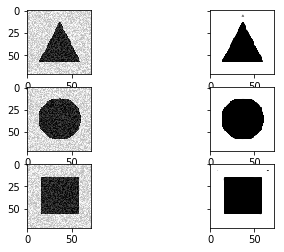

In [14]:
predict = model.predict(X_test)

im1 = X_test[0] * 255
im2 = predict[0] * 255

im3 = X_test[1] * 255
im4 = predict[1] * 255

im5 = X_test[2] * 255
im6 = predict[2] * 255

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey=True)
ax1.imshow(im1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax2.imshow(im2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax3.imshow(im3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax4.imshow(im4.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax5.imshow(im5.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
ax6.imshow(im6.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')